170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2158s 13us/step


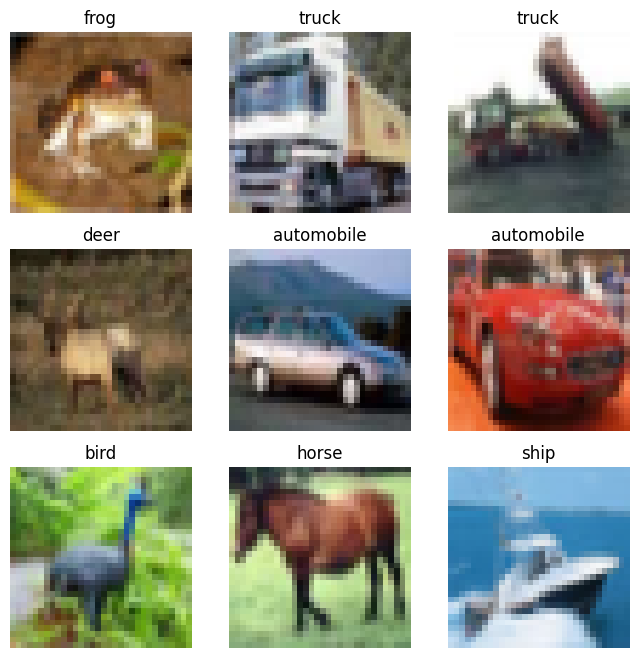

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 - 38s - 24ms/step - accuracy: 0.4874 - loss: 1.4365 - val_accuracy: 0.5883 - val_loss: 1.1713
Epoch 2/10
1563/1563 - 39s - 25ms/step - accuracy: 0.6217 - loss: 1.0783 - val_accuracy: 0.6532 - val_loss: 1.0109
Epoch 3/10
1563/1563 - 32s - 20ms/step - accuracy: 0.6766 - loss: 0.9320 - val_accuracy: 0.6510 - val_loss: 1.0071
Epoch 4/10
1563/1563 - 30s - 19ms/step - accuracy: 0.7119 - loss: 0.8304 - val_accuracy: 0.6799 - val_loss: 0.9327
Epoch 5/10
1563/1563 - 35s - 22ms/step - accuracy: 0.7424 - loss: 0.7420 - val_accuracy: 0.7014 - val_loss: 0.8899
Epoch 6/10
1563/1563 - 33s - 21ms/step - accuracy: 0.7696 - loss: 0.6683 - val_accuracy: 0.7022 - val_loss: 0.8869
Epoch 7/10
1563/1563 - 30s - 19ms/step - accuracy: 0.7907 - loss: 0.5985 - val_accuracy: 0.7029 - val_loss: 0.9002
Epoch 8/10
1563/1563 - 42s - 27ms/step - accuracy: 0.8129 - loss: 0.5349 - val_accuracy: 0.6949 - val_loss: 0.9659
Epoch 9/10
1563/1563 - 37s - 24ms/step - accuracy: 0.8328 - loss: 0.4766 - val_a

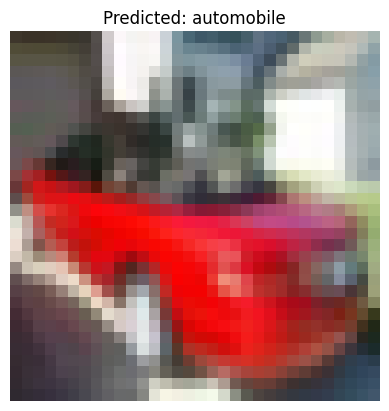

Finally


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values (0 to 1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Display some sample images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Conv layer 1
    MaxPooling2D((2, 2)),  # Pooling layer 1
    Conv2D(64, (3, 3), activation='relu'),  # Conv layer 2
    MaxPooling2D((2, 2)),  # Pooling layer 2
    Flatten(),  # Convert feature maps to a vector
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Show model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, 
                    validation_data=(x_test, y_test), verbose=2)
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

import random

# Select a random test image
index = random.randint(0, len(x_test) - 1)
image = x_test[index]

# Make a prediction
predictions = model.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(predictions)

# Display the image and prediction
plt.imshow(image)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis("off")
plt.show()


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


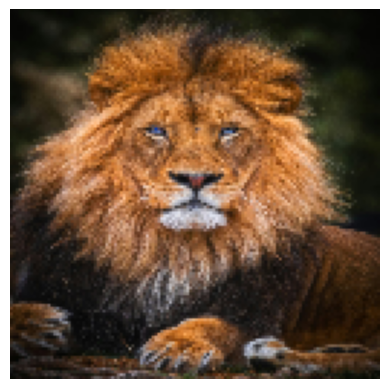

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
dataset_path = "dataset/lion"  # Change this to your actual dataset path

train_datagen = ImageDataGenerator(
    rescale=1.0/255,      # Normalize pixel values
    shear_range=0.2,      # Random shearing
    zoom_range=0.2,       # Random zooming
    horizontal_flip=True, # Flip images horizontally
    validation_split=0.2  # Reserve 20% for validation
)
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128), # Resize images to 128x128
    batch_size=32,          # Load in batches of 32
    class_mode='binary',    # Binary classification (0 or 1)
    subset='training'       # Use 80% for training
)
val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
import numpy as np
import matplotlib.pyplot as plt

# Load an image
img_path = "dataset/lion/lion1.jpg"  # Change to an actual image path
img = load_img(img_path, target_size=(128, 128))  # Resize

# Convert to NumPy array
img_array = img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Display image
plt.imshow(img)
plt.axis("off")
plt.show()



In [1]:
# cat identification

Found 193 images belonging to 6 classes.
Found 46 images belonging to 6 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,665 (12.61 MB)

 Trainable params: 3,305,217 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (99380499 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 160s 22s/step - accuracy: 0.1804 - loss: -9.4399 - val_accuracy: 0.5000 - val_loss: 1.6424
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 133s 19s/step - accuracy: 0.1085 - loss: -86.2631 - val_accuracy: 0.3478 - val_loss: 1.2548
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 154s 26s/step - accuracy: 0.0807 - loss: -91.0761 - val_accuracy: 0.3913 - val_loss: 1.3221
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 90s 15s/step - accuracy: 0.0816 - loss: -186.2655 - val_accuracy: 0.4783 - val_loss: 2.8546
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 88s 12s/step - accuracy: 0.0731 - loss: -258.4492 - val_accuracy: 0.4783 - val_loss: 4.1778
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 15s/step - accuracy: 0.0777 - loss: -165.3024 - val_accuracy: 0.5000 - val_loss: 14.1317
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 67s 10s/step - accuracy: 0.1057 - loss: -782.1840 - val_accuracy: 0.5000 - val_loss: 11.9780
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 71s 10s/step - accuracy: 0.0863 - loss: -609.8697 - val_accuracy: 

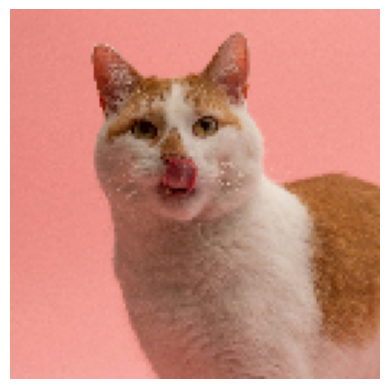

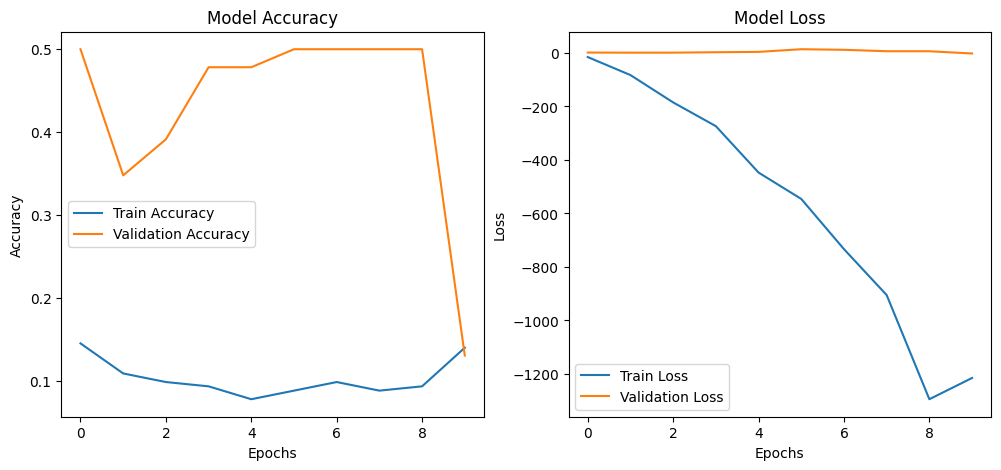

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# image path
dataset_path = "dataset" 

# processin the image
imagdata = ImageDataGenerator(
    rescale = 1.0 / 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

# train data set
train_data = imagdata.flow_from_directory(
    dataset_path,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'training'
)

# validation
val_data = imagdata.flow_from_directory(
    dataset_path,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'validation'
)

# traing the model
model = Sequential([
    # firts layer
    Input(shape = (128,128,3)),
    Conv2D(32, (3,3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # second layer
    Conv2D(64, (3,3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # last layer
    Conv2D(128, (3,3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()


history = model.fit(train_data, epochs = 10, validation_data = val_data)
model.save('cat_identifier.keras')

# loading the image
image_path = 'dataset/cat/cat13.jpg'
image = load_img(image_path, target_size = (128,128))
image_array = img_to_array(image).astype("float32") / 255.0 
image_array = np.expand_dims(image_array, axis = 0)

#  Predict
predictions = model.predict(image_array)[0][0]
print("🐾 Prediction:", "Cat" if predictions > 0.5 else "Not a cat")

# ploting
plt.imshow(image)
plt.axis('off')
plt.show()

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [27]:
# identyfing dog

Found 192 images belonging to 6 classes.
Found 46 images belonging to 6 classes.
Class indices: {'animals': 0, 'birds': 1, 'cat': 2, 'dog': 3, 'frog': 4, 'lion': 5}


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 79s 14s/step - accuracy: 0.2566 - loss: -5.5965 - val_accuracy: 0.0870 - val_loss: -53.9028
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 62s 11s/step - accuracy: 0.0722 - loss: -90.2415 - val_accuracy: 0.0870 - val_loss: -496.8202
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 62s 10s/step - accuracy: 0.0910 - loss: -550.5244 - val_accuracy: 0.0870 - val_loss: -2339.3579
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 61s 11s/step - accuracy: 0.1117 - loss: -2902.9116 - val_accuracy: 0.0870 - val_loss: -7517.6548
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 62s 11s/step - accuracy: 0.0987 - loss: -5346.8223 - val_accuracy: 0.0870 - val_loss: -19099.8184
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 61s 11s/step - accuracy: 0.1068 - loss: -21307.7539 - val_accuracy: 0.0870 - val_loss: -47934.8320
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 61s 11s/step - accuracy: 0.0821 - loss: -44855.8008 - val_accuracy: 0.0870 - val_loss: -114355.2812
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 61s 10s/step - accuracy: 0.0979 - lo

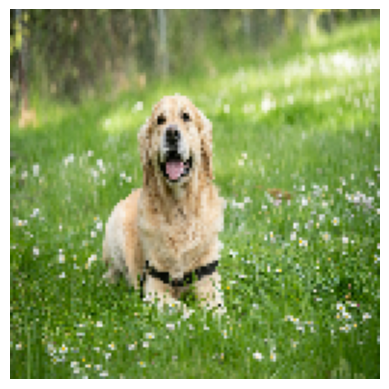

In [40]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# ✅ Dataset Path Check
path_dataset = 'dataset/'
if not os.path.exists(path_dataset):
    print("❌ The dataset folder does not exist!")
    sys.exit()

# ✅ Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# ✅ Load Training Data
train_dataset = train_datagen.flow_from_directory(
    path_dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# ✅ Load Validation Data
validate_data = train_datagen.flow_from_directory(
    path_dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# ✅ Print Class Indices for Debugging
print("Class indices:", train_dataset.class_indices)

# ✅ Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# ✅ Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(train_dataset, epochs=10, validation_data=validate_data)

# ✅ Save Model
model.save('dog_identifier_model.keras')

# ✅ Load Test Image
data_image = 'dataset/dog/dog1.jpg'
if not os.path.exists(data_image):
    print("❌ Image not found!")
    sys.exit()

load_image = load_img(data_image, target_size=(128, 128))
image_array = img_to_array(load_image) / 255.0  # Normalize
image_array = np.expand_dims(image_array, axis=0)

# ✅ Predict Image
predict = model.predict(image_array)[0][0]
confidence = predict * 100  # Convert to percentage

if predict > 0.5:
    print(f"✅ The animal is a Dog 🐶 (Confidence: {confidence:.2f}%)")
else:
    print(f"❌ The animal is NOT a Dog (Confidence: {100 - confidence:.2f}%)")

# ✅ Plot Image
plt.imshow(load_image)
plt.axis('off')
plt.show()


In [41]:
# bird 

Found 193 images belonging to 6 classes.
Found 46 images belonging to 6 classes.
Class indices: {'animals': 0, 'birds': 1, 'cat': 2, 'dog': 3, 'frog': 4, 'lion': 5}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,665 (12.61 MB)

 Trainable params: 3,305,217 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (99380499 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.3293 - loss: 0.7229  

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 166s 26s/step - accuracy: 0.3192 - loss: 0.7498 - val_accuracy: 0.4783 - val_loss: 0.7178
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 118s 17s/step - accuracy: 0.2478 - loss: 0.6943 - val_accuracy: 0.3913 - val_loss: 0.7477
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 141s 17s/step - accuracy: 0.2747 - loss: 0.1337 - val_accuracy: 0.3913 - val_loss: 0.7591
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 115s 17s/step - accuracy: 0.2124 - loss: 0.2084 - val_accuracy: 0.3696 - val_loss: 0.7636
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 146s 18s/step - accuracy: 0.2158 - loss: 0.9477 - val_accuracy: 0.3261 - val_loss: 0.7681
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 123s 18s/step - accuracy: 0.2507 - loss: 0.1902 - val_accuracy: 0.3696 - val_loss: 0.7650
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 124s 18s/step - accuracy: 0.2568 - loss: 0.9262 - val_accuracy: 0.3696 - val_loss: 0.7568
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 20s/step - accuracy: 0.2370 - loss: -0.8632 - val_accuracy: 0.2391 - val_loss: 0.7513
Ep

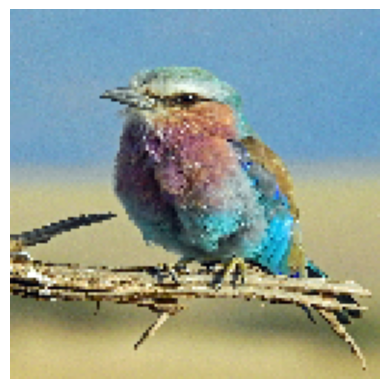

In [2]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam

dataset_path = 'dataset/'

if not os.path.exists(dataset_path):
    print("The image folder does not exist")
    sys.exit()

# Preprocessing the image
datagenerator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Train
train_data = datagenerator.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True,
)

# Validation
data_validate = datagenerator.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
)

# Check Class Indices
class_indices = train_data.class_indices
print(f"Class indices: {class_indices}")

# Model Training
model = Sequential([
    # Layer 1
    Input(shape = (128,128,3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Last Layer
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Use Adam with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0000001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Train Model
history = model.fit(train_data, epochs=10, validation_data=data_validate)

# Save Model
model.save('birds_identifier.keras')

# Image Path
image_path = 'dataset/birds/bird4.jpg'

if not os.path.exists(image_path):
    print("Image does not exist!")
    sys.exit()

# Load and Preprocess Image
image_load = load_img(image_path, target_size=(128, 128))
image_array = img_to_array(image_load).astype('float32') / 255.0
image_scaled = np.expand_dims(image_array, axis=0)

# Prediction
predicted = model.predict(image_scaled)[0][0]

if predicted > 0.5:
    print("This is a bird ")
else:
    print("This is not a bird ")

# Plot Image
plt.imshow(image_load)
plt.axis("off")
plt.show()


In [58]:
# frog

Found 193 images belonging to 6 classes.
Found 46 images belonging to 6 classes.
Class indices: {'animals': 0, 'birds': 1, 'cat': 2, 'dog': 3, 'frog': 4, 'lion': 5}


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,665 (12.61 MB)

 Trainable params: 3,305,217 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 89s 12s/step - accuracy: 0.1749 - loss: 0.0087 - val_accuracy: 0.0870 - val_loss: 0.6423
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 74s 11s/step - accuracy: 0.1189 - loss: -0.1604 - val_accuracy: 0.0870 - val_loss: 0.6391
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 75s 10s/step - accuracy: 0.1182 - loss: -1.4422 - val_accuracy: 0.0870 - val_loss: 0.6193
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 78s 10s/step - accuracy: 0.0999 - loss: -1.3143 - val_accuracy: 0.0870 - val_loss: 0.6229
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 71s 10s/step - accuracy: 0.1083 - loss: -0.6059 - val_accuracy: 0.0870 - val_loss: 0.6103
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 74s 10s/step - accuracy: 0.0959 - loss: -1.1300 - val_accuracy: 0.0870 - val_loss: 0.5988
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.1176 - loss: -2.2735 - val_accuracy: 0.0870 - val_loss: 0.5689
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 75s 11s/step - accuracy: 0.1255 - loss: -2.4263 - val_accuracy: 0.0870 - val_loss: 

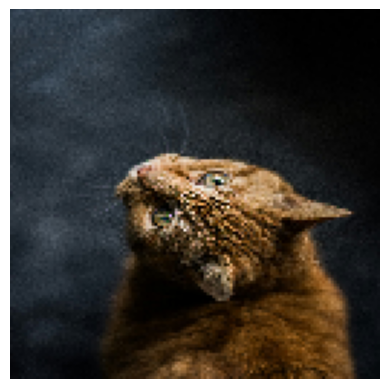

In [6]:
import os
import sys
import numpy as np
import tensorflow
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# image path
dataset_path = 'dataset/'

if not os.path.exists(dataset_path):
    print("The image folder does not exists!")
    sys.exit()

datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

# traing dataset
data_train = datagen.flow_from_directory(
    dataset_path,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'training',
    shuffle = True
)

# validate data
validateset_data = datagen.flow_from_directory(
    dataset_path,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'validation',
)

# model
print(f"Class indices: {data_train.class_indices}")

model = Sequential([
    Input(shape = (128,128,3)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = Adam(learning_rate = 0.00001), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
histo = model.fit(data_train,validation_data = validateset_data, epochs = 10)

# saving
model.save('Frog_identifier.keras')

# geting the image
immage = 'dataset/frog/frog18.jpg'

if not os.path.exists(immage):
    print("Image does not exists!")
    sys.exit()
    
load = load_img(immage,target_size = (128,128))
array_image = img_to_array(load).astype('float32') / 255.0
array_image = np.expand_dims(array_image, axis = 0)

predict = model.predict(array_image)[0][0]

if predict > 0.5:
    print("Frog identified.")
else:
    print("The animal is not a frog")

# plotting
plt.imshow(load)
plt.axis("off")
plt.show()

In [ ]:
# lion identifier

Found 193 images belonging to 6 classes.
Found 46 images belonging to 6 classes.
The class indices: {'animals': 0, 'birds': 1, 'cat': 2, 'dog': 3, 'frog': 4, 'lion': 5}


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,665 (12.61 MB)

 Trainable params: 3,305,217 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.2418 - loss: 1.2598 - val_accuracy: 0.4565 - val_loss: 0.9336
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 69s 10s/step - accuracy: 0.0924 - loss: -3.9914 - val_accuracy: 0.2391 - val_loss: 0.7996
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 69s 10s/step - accuracy: 0.1266 - loss: -3.4252 - val_accuracy: 0.1304 - val_loss: 0.5798
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 69s 12s/step - accuracy: 0.0830 - loss: -10.2700 - val_accuracy: 0.0870 - val_loss: 0.4078
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 9s/step - accuracy: 0.1194 - loss: -8.6989 - val_accuracy: 0.1087 - val_loss: 0.3153
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - accuracy: 0.0873 - loss: -13.8529 - val_accuracy: 0.0870 - val_loss: 0.1277
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 73s 11s/step - accuracy: 0.1088 - loss: -11.5953 - val_accuracy: 0.0870 - val_loss: 0.0902
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 66s 9s/step - accuracy: 0.0843 - loss: -17.5372 - val_accuracy: 0.0870 - val_loss

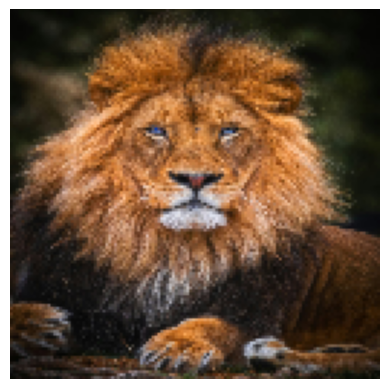

In [8]:
import os
import sys
import keras
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# path
image_path = 'dataset/'

if not os.path.exists(image_path):
    print("The Image folder does not exists!!")
    sys.exit()

# datagen
train_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
    
)

# train dataset
dataset_train = train_datagen.flow_from_directory(
    image_path,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'training',
    shuffle = True,
)

# validate
dataset_validate = train_datagen.flow_from_directory(
    image_path,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'validation',
)

# model training
model = Sequential([
    Input(shape=(128,128,3)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    # second layer
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    # last layer
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

print(f"The class indices: {dataset_train.class_indices}")

model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
history = model.fit(dataset_train, validation_data = dataset_validate, epochs = 10)

model.save("Lion_identifiere.keras")

# loading image
image = 'dataset/lion/lion1.jpg'

if not os.path.exists(image):
    print("Image does not exists!")
    sys.exit()

loading_image = load_img(image, target_size = (128,128))
image_array = img_to_array(loading_image).astype("float32") / 255.0
image_array = np.expand_dims(image_array, axis = 0)


# prediction
predicted = model.predict(image_array)[0][0]

if predicted > 0.5:
    print("🦁 The animal is a Lion!")
else:
    print("The animal is not a Lion!")

#plotting
plt.imshow(loading_image)
plt.axis("off")
plt.show()

In [ ]:
# latest

In [ ]:
print("hello")

In [ ]:
import numpy as np
import tensorflow
from keras.layers import Conv2D, MaxPool2D(),Flatte